Link to supporting video for below notebook walkhthrough - https://www.youtube.com/watch?v=91QljBnvM7s

In [1]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

Sun Aug  9 11:56:04 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
openjdk version "11.0.8" 2020-07-14
OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)


In [5]:
!pip install h2o

     |████████████████████████████████| 128.8MB 114kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.7-py2.py3-none-any.whl size=128865965 sha256=0ee53b45ad7ac9f0d48fd9d78c5a2da47b67b0562e0514dbc767da470a5003ee
  Stored in directory: /root/.cache/pip/wheels/a6/c2/6d/9612d426d2c947be23a8cd2d0156a9107927de630b8821ecea
Successfully built h2o


In [6]:
 import h2o

In [7]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp6pre3kz3
  JVM stdout: /tmp/tmp6pre3kz3/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp6pre3kz3/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_unknownUser_lq2v1q
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [10]:
from h2o.automl import H2OAutoML

In [11]:
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [13]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [14]:
churn_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [15]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [ ]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No


In [16]:
y = "Churn"
x = churn_df.columns


In [17]:
type(x)

list

In [18]:
x.remove(y)
x.remove("customerID")

In [31]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


In [32]:
!nvidia-smi

Sun Aug  9 12:35:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [33]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
12:35:15.723: Project: AutoML_20200809_123515719
12:35:15.723: Cross-validation disabled by user: no fold column nor nfolds > 1.
12:35:15.724: Setting stopping tolerance adaptively based on the training frame: 0.014297390392514892
12:35:15.724: Build control seed: 10
12:35:15.724: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
12:35:15.807: training frame: Frame key: automl_training_py_2_sid_801f    cols: 21    rows: 4419  chunks: 8    size: 293415  checksum: -2792922625220634074
12:35:15.807: validation frame: Frame key: py_4_sid_801f    cols: 21    rows: 1060  chunks: 8    size: 139060  checksum: -7660538771179971916
12:35:15.811: leaderboard frame: Frame key: automl_leaderboard_py_2_sid_801f    cols: 21    rows: 473  chunks: 8    size: 124269  checksum: -2646532227526134283
12:35:15.811: blending frame: NULL
12:35:15.811: response column: Churn

In [34]:
!nvidia-smi

Sun Aug  9 12:36:11 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    28W /  70W |    127MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [37]:
lb = aml.leaderboard

In [38]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_5_AutoML_20200809_123515,0.846522,0.393658,0.65456,0.22296,0.357054,0.127488
GLM_1_AutoML_20200809_123515,0.843928,0.40009,0.635147,0.220084,0.360272,0.129796
GBM_1_AutoML_20200809_123515,0.841372,0.400873,0.627216,0.232325,0.360218,0.129757
XGBoost_2_AutoML_20200809_123515,0.836308,0.407579,0.619537,0.252606,0.3642,0.132642
XGBoost_3_AutoML_20200809_123515,0.834538,0.410884,0.628439,0.249312,0.36385,0.132387
GBM_2_AutoML_20200809_123515,0.831023,0.409209,0.643948,0.247923,0.361834,0.130924
GBM_3_AutoML_20200809_123515,0.828736,0.411165,0.649929,0.253417,0.364998,0.133224
XGBoost_1_AutoML_20200809_123515,0.817957,0.436306,0.594151,0.268818,0.375829,0.141247
GBM_4_AutoML_20200809_123515,0.814368,0.430234,0.62697,0.28471,0.374425,0.140194
DRF_1_AutoML_20200809_123515,0.808001,0.491447,0.621799,0.258972,0.373282,0.13934


In [39]:
churn_pred=aml.leader.predict(churn_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [40]:
churn_pred.head()

predict,No,Yes
No,0.667675,0.332325
No,0.944887,0.0551133
Yes,0.171622,0.828378
No,0.975327,0.0246728
Yes,0.336321,0.663679
No,0.946513,0.0534871
No,0.918389,0.0816111
No,0.956359,0.0436406
No,0.942915,0.0570852
No,0.978887,0.021113


In [41]:
aml.leader.model_performance(churn_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.12574949623882764
RMSE: 0.3546117542310571
LogLoss: 0.3894681117444613
Mean Per-Class Error: 0.2031417112299465
AUC: 0.8627963458110517
AUCPR: 0.6679615381301902
Gini: 0.7255926916221034

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2644079418663551: 


,,No,Yes,Error,Rate
0,No,618.0,198.0,0.2426,(198.0/816.0)
1,Yes,45.0,230.0,0.1636,(45.0/275.0)
2,Total,663.0,428.0,0.2227,(243.0/1091.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.264408,0.654339,219.0
1,max f2,0.187282,0.777983,262.0
2,max f0point5,0.467577,0.635492,137.0
3,max accuracy,0.467577,0.815765,137.0
4,max precision,0.902310,1.000000,0.0
5,max recall,0.014775,1.000000,396.0
6,max specificity,0.902310,1.000000,0.0
7,max absolute_mcc,0.264408,0.527973,219.0
8,max min_per_class_accuracy,0.302595,0.786765,203.0
9,max mean_per_class_accuracy,0.264408,0.796858,219.0



Gains/Lift Table: Avg response rate: 25.21 %, avg score: 26.14 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010082,0.874867,3.606612,3.606612,0.909091,0.887847,0.909091,0.887847,0.036364,0.036364,260.661157,260.661157,0.035138
1,2,0.020165,0.843734,3.245950,3.426281,0.818182,0.860942,0.863636,0.874394,0.032727,0.069091,224.595041,242.628099,0.065414
2,3,0.030247,0.814376,3.245950,3.366171,0.818182,0.833181,0.848485,0.860657,0.032727,0.101818,224.595041,236.617080,0.095691
3,4,0.040330,0.793793,2.885289,3.245950,0.727273,0.804360,0.818182,0.846583,0.029091,0.130909,188.528926,224.595041,0.121105
4,5,0.050412,0.775670,3.606612,3.318083,0.909091,0.785370,0.836364,0.834340,0.036364,0.167273,260.661157,231.808264,0.156243
5,6,0.100825,0.640170,2.741025,3.029554,0.690909,0.702081,0.763636,0.768210,0.138182,0.305455,174.102479,202.955372,0.273592
6,7,0.150321,0.571217,2.130572,2.733548,0.537037,0.606356,0.689024,0.714917,0.105455,0.410909,113.057239,173.354767,0.348409
7,8,0.200733,0.495953,2.163967,2.590502,0.545455,0.532843,0.652968,0.669190,0.109091,0.520000,116.396694,159.050228,0.426863
8,9,0.300642,0.363298,1.637865,2.273925,0.412844,0.430329,0.573171,0.589813,0.163636,0.683636,63.786489,127.392461,0.512068
9,10,0.400550,0.255518,1.601468,2.106195,0.403670,0.306683,0.530892,0.519192,0.160000,0.843636,60.146789,110.619513,0.592411


In [43]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])


In [44]:
model_ids

['GBM_5_AutoML_20200809_123515',
 'GLM_1_AutoML_20200809_123515',
 'GBM_1_AutoML_20200809_123515',
 'XGBoost_2_AutoML_20200809_123515',
 'XGBoost_3_AutoML_20200809_123515',
 'GBM_2_AutoML_20200809_123515',
 'GBM_3_AutoML_20200809_123515',
 'XGBoost_1_AutoML_20200809_123515',
 'GBM_4_AutoML_20200809_123515',
 'DRF_1_AutoML_20200809_123515']

In [45]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_20200809_123515


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10623395065622052
RMSE: 0.3259355007608415
LogLoss: 0.3376495747816394
Mean Per-Class Error: 0.17308167999141244
AUC: 0.9073451785889305
AUCPR: 0.7979869100223298
Gini: 0.814690357177861

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3635728120803833: 


,,No,Yes,Error,Rate
0,No,2774.0,448.0,0.139,(448.0/3222.0)
1,Yes,256.0,941.0,0.2139,(256.0/1197.0)
2,Total,3030.0,1389.0,0.1593,(704.0/4419.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.363573,0.727765,207.0
1,max f2,0.208791,0.804248,272.0
2,max f0point5,0.568486,0.744491,131.0
3,max accuracy,0.424132,0.852229,182.0
4,max precision,0.973364,1.000000,0.0
5,max recall,0.009523,1.000000,391.0
6,max specificity,0.973364,1.000000,0.0
7,max absolute_mcc,0.424132,0.626196,182.0
8,max min_per_class_accuracy,0.316159,0.826232,225.0
9,max mean_per_class_accuracy,0.323156,0.826918,223.0



Gains/Lift Table: Avg response rate: 27.09 %, avg score: 27.20 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010183,0.930673,3.691729,3.691729,1.000000,0.946273,1.000000,0.946273,0.037594,0.037594,269.172932,269.172932,0.037594
1,2,0.020367,0.913044,3.691729,3.691729,1.000000,0.923323,1.000000,0.934798,0.037594,0.075188,269.172932,269.172932,0.075188
2,3,0.030097,0.884029,3.605875,3.663972,0.976744,0.899243,0.992481,0.923303,0.035088,0.110276,260.587515,266.397196,0.109965
3,4,0.040054,0.866216,3.272215,3.566586,0.886364,0.875951,0.966102,0.911532,0.032581,0.142857,227.221463,256.658596,0.140995
4,5,0.050011,0.848827,3.356118,3.524683,0.909091,0.857347,0.954751,0.900744,0.033417,0.176274,235.611757,252.468275,0.173170
5,6,0.100249,0.744240,3.093071,3.308389,0.837838,0.794456,0.896163,0.847480,0.155388,0.331662,209.307051,230.838948,0.317386
6,7,0.150034,0.644623,2.785578,3.134907,0.754545,0.695485,0.849170,0.797044,0.138680,0.470343,178.557758,213.490740,0.439306
7,8,0.200045,0.540548,2.355357,2.940020,0.638009,0.590366,0.796380,0.745375,0.117794,0.588137,135.535672,194.001973,0.532271
8,9,0.300068,0.380982,1.762341,2.547460,0.477376,0.457635,0.690045,0.649461,0.176274,0.764411,76.234137,154.746028,0.636851
9,10,0.400091,0.245934,1.069098,2.177870,0.289593,0.314267,0.589932,0.565663,0.106934,0.871345,6.909808,117.786973,0.646330




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.1457976210597662
RMSE: 0.3818345467080817
LogLoss: 0.44645097955731466
Mean Per-Class Error: 0.24077065485697702
AUC: 0.8264665311456367
AUCPR: 0.6260674608496537
Gini: 0.6529330622912735

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24070247262716293: 


,,No,Yes,Error,Rate
0,No,569.0,207.0,0.2668,(207.0/776.0)
1,Yes,61.0,223.0,0.2148,(61.0/284.0)
2,Total,630.0,430.0,0.2528,(268.0/1060.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.240702,0.624650,241.0
1,max f2,0.088327,0.743733,325.0
2,max f0point5,0.563618,0.610577,120.0
3,max accuracy,0.588024,0.793396,112.0
4,max precision,0.970780,1.000000,0.0
5,max recall,0.004549,1.000000,397.0
6,max specificity,0.970780,1.000000,0.0
7,max absolute_mcc,0.240702,0.467627,241.0
8,max min_per_class_accuracy,0.261951,0.750000,230.0
9,max mean_per_class_accuracy,0.240702,0.759229,241.0



Gains/Lift Table: Avg response rate: 26.79 %, avg score: 26.58 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010377,0.929569,3.393086,3.393086,0.909091,0.946198,0.909091,0.946198,0.035211,0.035211,239.308579,239.308579,0.033923
1,2,0.020755,0.907292,2.714469,3.053777,0.727273,0.920697,0.818182,0.933447,0.028169,0.063380,171.446863,205.377721,0.058226
2,3,0.030189,0.877316,2.985915,3.032570,0.800000,0.890028,0.812500,0.919879,0.028169,0.091549,198.591549,203.257042,0.083817
3,4,0.040566,0.850529,2.714469,2.951196,0.727273,0.866635,0.790698,0.906258,0.028169,0.119718,171.446863,195.119555,0.108120
4,5,0.050000,0.824908,2.612676,2.887324,0.700000,0.836837,0.773585,0.893160,0.024648,0.144366,161.267606,188.732394,0.128902
5,6,0.100000,0.730969,2.676056,2.781690,0.716981,0.773801,0.745283,0.833480,0.133803,0.278169,167.605634,178.169014,0.243375
6,7,0.150000,0.620365,2.183099,2.582160,0.584906,0.675062,0.691824,0.780674,0.109155,0.387324,118.309859,158.215962,0.324180
7,8,0.200000,0.520114,1.619718,2.341549,0.433962,0.569687,0.627358,0.727927,0.080986,0.468310,61.971831,134.154930,0.366506
8,9,0.300000,0.358567,1.549296,2.077465,0.415094,0.431262,0.556604,0.629039,0.154930,0.623239,54.929577,107.746479,0.441538
9,10,0.400000,0.245533,1.514085,1.936620,0.405660,0.303051,0.518868,0.547542,0.151408,0.774648,51.408451,93.661972,0.511761




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-08-09 12:35:19,0.002 sec,0.0,0.500000,0.693147,0.500000,0.270876,1.000000,0.729124,0.500000,0.693147,0.500000,0.267925,1.000000,0.732075
1,,2020-08-09 12:35:19,0.309 sec,5.0,0.362751,0.422368,0.871125,0.711574,3.356118,0.198235,0.379856,0.451557,0.832302,0.644061,3.393086,0.230189
2,,2020-08-09 12:35:19,0.558 sec,10.0,0.348103,0.382374,0.880692,0.737968,3.531219,0.184883,0.377385,0.434500,0.831372,0.635628,3.393086,0.223585
3,,2020-08-09 12:35:20,0.841 sec,15.0,0.340717,0.366080,0.889097,0.758087,3.691729,0.171306,0.377598,0.433377,0.833339,0.639888,3.393086,0.250943
4,,2020-08-09 12:35:20,1.153 sec,20.0,0.334574,0.354281,0.896534,0.776077,3.691729,0.171985,0.380286,0.440383,0.828368,0.631006,3.393086,0.243396
5,,2020-08-09 12:35:20,1.466 sec,25.0,0.329770,0.344964,0.902723,0.789752,3.691729,0.165422,0.382833,0.445942,0.825334,0.617802,3.053777,0.251887
6,,2020-08-09 12:35:21,1.731 sec,30.0,0.325936,0.337650,0.907345,0.797987,3.691729,0.159312,0.381835,0.446451,0.826467,0.626067,3.393086,0.252830



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,683.434753,1.000000,0.201274
1,MonthlyCharges,550.686096,0.805763,0.162179
2,TotalCharges,521.309998,0.762779,0.153527
3,tenure,466.433716,0.682485,0.137366
4,TechSupport.No,198.896286,0.291025,0.058576
5,OnlineSecurity.No,169.990524,0.248730,0.050063
6,InternetService.Fiberoptic,96.434006,0.141102,0.028400
7,PaymentMethod.Electroniccheck,81.083313,0.118641,0.023879
8,PaperlessBilling.No,67.433014,0.098668,0.019859
9,gender.Female,64.801041,0.094817,0.019084



See the whole table with table.as_data_frame()


In [46]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [47]:
out.params

{'backend': {'actual': 'auto', 'default': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False},
 'calibrate_model': {'actual': False, 'default': False},
 'calibration_frame': {'actual': None, 'default': None},
 'categorical_encoding': {'actual': 'AUTO', 'default': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0},
 'distribution': {'actual': 'bernoulli', 'default': 'AUTO'},
 'dmatrix_type': {'actual': 'auto', 'default': 'auto'},
 'eta': {'actual': 0.3, 'default': 0.3},
 'export_checkpoints_dir': {'actual': None, 'default': None},
 'fold_assignment': {'actual': 'AUTO', 'default': 'AUTO'},
 'fold_column': {'actual': None, 'default': None},
 'gainslift_bins': {'actual': -1, 'default': -1},
 

In [48]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_delta_step': 0.0,
  'max_depth': 20,
  'min_child_weight': 10.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 11,
  'silent': True,
  'subsample': 0.6,
  'tree_method': 'auto'},
 10000)

In [49]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_20200809_123515


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10623395065622052
RMSE: 0.3259355007608415
LogLoss: 0.3376495747816394
Mean Per-Class Error: 0.17308167999141244
AUC: 0.9073451785889305
AUCPR: 0.7979869100223298
Gini: 0.814690357177861

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3635728120803833: 


,,No,Yes,Error,Rate
0,No,2774.0,448.0,0.139,(448.0/3222.0)
1,Yes,256.0,941.0,0.2139,(256.0/1197.0)
2,Total,3030.0,1389.0,0.1593,(704.0/4419.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.363573,0.727765,207.0
1,max f2,0.208791,0.804248,272.0
2,max f0point5,0.568486,0.744491,131.0
3,max accuracy,0.424132,0.852229,182.0
4,max precision,0.973364,1.000000,0.0
5,max recall,0.009523,1.000000,391.0
6,max specificity,0.973364,1.000000,0.0
7,max absolute_mcc,0.424132,0.626196,182.0
8,max min_per_class_accuracy,0.316159,0.826232,225.0
9,max mean_per_class_accuracy,0.323156,0.826918,223.0



Gains/Lift Table: Avg response rate: 27.09 %, avg score: 27.20 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010183,0.930673,3.691729,3.691729,1.000000,0.946273,1.000000,0.946273,0.037594,0.037594,269.172932,269.172932,0.037594
1,2,0.020367,0.913044,3.691729,3.691729,1.000000,0.923323,1.000000,0.934798,0.037594,0.075188,269.172932,269.172932,0.075188
2,3,0.030097,0.884029,3.605875,3.663972,0.976744,0.899243,0.992481,0.923303,0.035088,0.110276,260.587515,266.397196,0.109965
3,4,0.040054,0.866216,3.272215,3.566586,0.886364,0.875951,0.966102,0.911532,0.032581,0.142857,227.221463,256.658596,0.140995
4,5,0.050011,0.848827,3.356118,3.524683,0.909091,0.857347,0.954751,0.900744,0.033417,0.176274,235.611757,252.468275,0.173170
5,6,0.100249,0.744240,3.093071,3.308389,0.837838,0.794456,0.896163,0.847480,0.155388,0.331662,209.307051,230.838948,0.317386
6,7,0.150034,0.644623,2.785578,3.134907,0.754545,0.695485,0.849170,0.797044,0.138680,0.470343,178.557758,213.490740,0.439306
7,8,0.200045,0.540548,2.355357,2.940020,0.638009,0.590366,0.796380,0.745375,0.117794,0.588137,135.535672,194.001973,0.532271
8,9,0.300068,0.380982,1.762341,2.547460,0.477376,0.457635,0.690045,0.649461,0.176274,0.764411,76.234137,154.746028,0.636851
9,10,0.400091,0.245934,1.069098,2.177870,0.289593,0.314267,0.589932,0.565663,0.106934,0.871345,6.909808,117.786973,0.646330




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.1457976210597662
RMSE: 0.3818345467080817
LogLoss: 0.44645097955731466
Mean Per-Class Error: 0.24077065485697702
AUC: 0.8264665311456367
AUCPR: 0.6260674608496537
Gini: 0.6529330622912735

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24070247262716293: 


,,No,Yes,Error,Rate
0,No,569.0,207.0,0.2668,(207.0/776.0)
1,Yes,61.0,223.0,0.2148,(61.0/284.0)
2,Total,630.0,430.0,0.2528,(268.0/1060.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.240702,0.624650,241.0
1,max f2,0.088327,0.743733,325.0
2,max f0point5,0.563618,0.610577,120.0
3,max accuracy,0.588024,0.793396,112.0
4,max precision,0.970780,1.000000,0.0
5,max recall,0.004549,1.000000,397.0
6,max specificity,0.970780,1.000000,0.0
7,max absolute_mcc,0.240702,0.467627,241.0
8,max min_per_class_accuracy,0.261951,0.750000,230.0
9,max mean_per_class_accuracy,0.240702,0.759229,241.0



Gains/Lift Table: Avg response rate: 26.79 %, avg score: 26.58 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010377,0.929569,3.393086,3.393086,0.909091,0.946198,0.909091,0.946198,0.035211,0.035211,239.308579,239.308579,0.033923
1,2,0.020755,0.907292,2.714469,3.053777,0.727273,0.920697,0.818182,0.933447,0.028169,0.063380,171.446863,205.377721,0.058226
2,3,0.030189,0.877316,2.985915,3.032570,0.800000,0.890028,0.812500,0.919879,0.028169,0.091549,198.591549,203.257042,0.083817
3,4,0.040566,0.850529,2.714469,2.951196,0.727273,0.866635,0.790698,0.906258,0.028169,0.119718,171.446863,195.119555,0.108120
4,5,0.050000,0.824908,2.612676,2.887324,0.700000,0.836837,0.773585,0.893160,0.024648,0.144366,161.267606,188.732394,0.128902
5,6,0.100000,0.730969,2.676056,2.781690,0.716981,0.773801,0.745283,0.833480,0.133803,0.278169,167.605634,178.169014,0.243375
6,7,0.150000,0.620365,2.183099,2.582160,0.584906,0.675062,0.691824,0.780674,0.109155,0.387324,118.309859,158.215962,0.324180
7,8,0.200000,0.520114,1.619718,2.341549,0.433962,0.569687,0.627358,0.727927,0.080986,0.468310,61.971831,134.154930,0.366506
8,9,0.300000,0.358567,1.549296,2.077465,0.415094,0.431262,0.556604,0.629039,0.154930,0.623239,54.929577,107.746479,0.441538
9,10,0.400000,0.245533,1.514085,1.936620,0.405660,0.303051,0.518868,0.547542,0.151408,0.774648,51.408451,93.661972,0.511761




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-08-09 12:35:19,0.002 sec,0.0,0.500000,0.693147,0.500000,0.270876,1.000000,0.729124,0.500000,0.693147,0.500000,0.267925,1.000000,0.732075
1,,2020-08-09 12:35:19,0.309 sec,5.0,0.362751,0.422368,0.871125,0.711574,3.356118,0.198235,0.379856,0.451557,0.832302,0.644061,3.393086,0.230189
2,,2020-08-09 12:35:19,0.558 sec,10.0,0.348103,0.382374,0.880692,0.737968,3.531219,0.184883,0.377385,0.434500,0.831372,0.635628,3.393086,0.223585
3,,2020-08-09 12:35:20,0.841 sec,15.0,0.340717,0.366080,0.889097,0.758087,3.691729,0.171306,0.377598,0.433377,0.833339,0.639888,3.393086,0.250943
4,,2020-08-09 12:35:20,1.153 sec,20.0,0.334574,0.354281,0.896534,0.776077,3.691729,0.171985,0.380286,0.440383,0.828368,0.631006,3.393086,0.243396
5,,2020-08-09 12:35:20,1.466 sec,25.0,0.329770,0.344964,0.902723,0.789752,3.691729,0.165422,0.382833,0.445942,0.825334,0.617802,3.053777,0.251887
6,,2020-08-09 12:35:21,1.731 sec,30.0,0.325936,0.337650,0.907345,0.797987,3.691729,0.159312,0.381835,0.446451,0.826467,0.626067,3.393086,0.252830



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,683.434753,1.000000,0.201274
1,MonthlyCharges,550.686096,0.805763,0.162179
2,TotalCharges,521.309998,0.762779,0.153527
3,tenure,466.433716,0.682485,0.137366
4,TechSupport.No,198.896286,0.291025,0.058576
5,OnlineSecurity.No,169.990524,0.248730,0.050063
6,InternetService.Fiberoptic,96.434006,0.141102,0.028400
7,PaymentMethod.Electroniccheck,81.083313,0.118641,0.023879
8,PaperlessBilling.No,67.433014,0.098668,0.019859
9,gender.Female,64.801041,0.094817,0.019084



See the whole table with table.as_data_frame()


In [ ]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [ ]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3606812246143818: 


,,No,Yes,Error,Rate
0,No,2752.0,502.0,0.1543,(502.0/3254.0)
1,Yes,284.0,916.0,0.2367,(284.0/1200.0)
2,Total,3036.0,1418.0,0.1765,(786.0/4454.0)


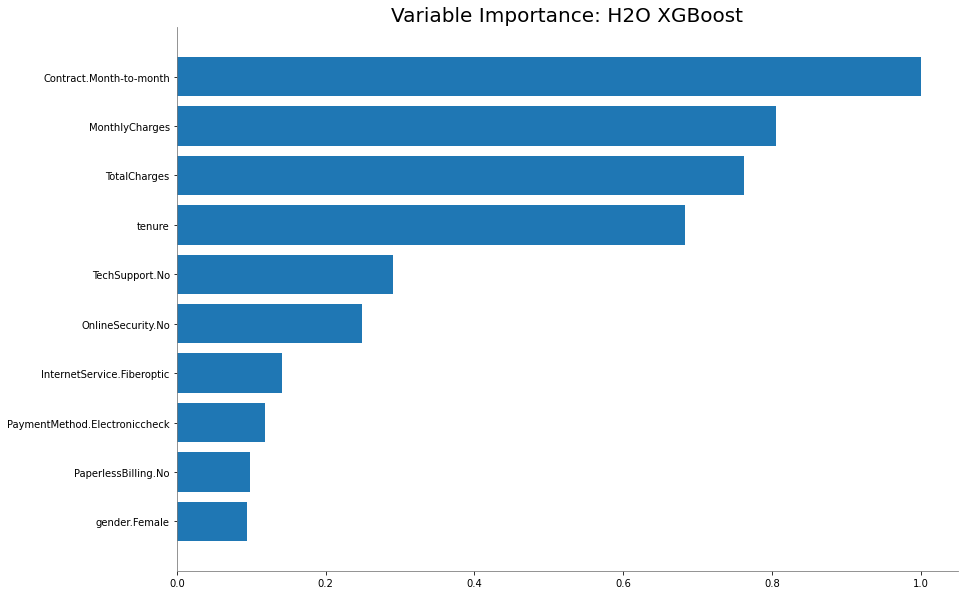

In [50]:
out.varimp_plot()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [52]:
aml.leader.download_mojo(path = "./")

'/content/GBM_5_AutoML_20200809_123515.zip'